# Machine Learning Model Optimization Project for ABC Private Limited

In [48]:
# Necessary library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
# Loading the data
data_path = r"/Users/greenwood/Black-Friday-Sales-Prediction-main/Data/BlackFridaySales.csv"
df = pd.read_csv(data_path)

In [3]:
# Displaying basic information about the dataset
print("\nBasic Information of Dataset:\n")
display(df.info())

# Displaying the first few rows of the dataset to understand the data format
print("\nFirst 5 Rows of Dataset:")
display(df.head())

# Displaying statistical summaries of the dataset to get insights into the numerical features
print("\nStatistical Summary of Numerical Features:")
display(df.describe())


Basic Information of Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memor

None


First 5 Rows of Dataset:


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969



Statistical Summary of Numerical Features:


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
# Handling Missing Values
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(), inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(), inplace=True)

display(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

<div style="background-color: #305080; padding: 10px; border: 3px solid white;">
    <p style="text-align: center; color: white; font-size: 24px; margin: 0; position: relative; top: 50%; transform: translateY(-50%);">
        &ndash;&ndash;&ndash;&nbsp;Exploratory Data Analysis (EDA)&nbsp;&ndash;&ndash;&ndash;
    </p>
</div>

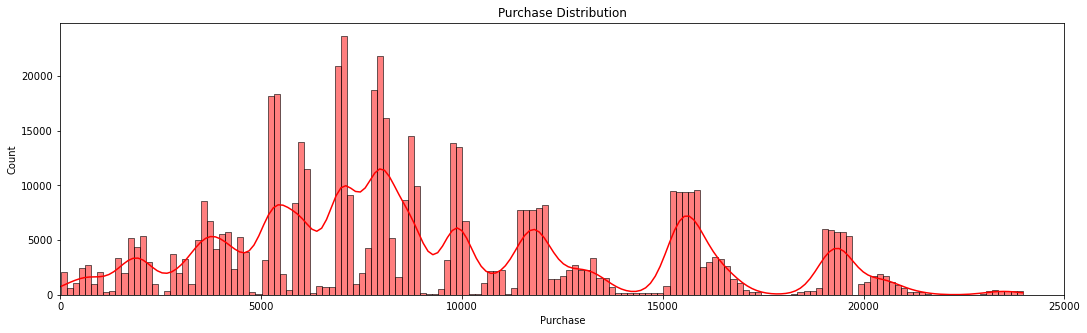

In [5]:
# 'Purchase' distribution
plt.figure(figsize=(18, 5))
sns.histplot(df["Purchase"], kde=True, color='red')
plt.title("Purchase Distribution")
plt.xlim(0, 25000)
plt.show()

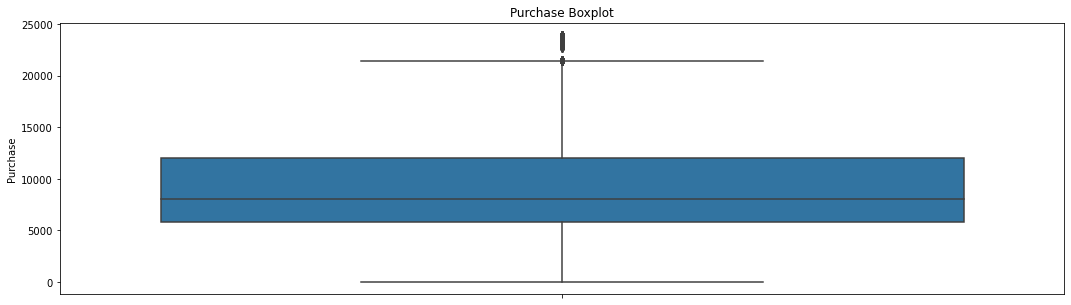

In [6]:
plt.figure(figsize=(18, 5))
sns.boxplot(y=df["Purchase"])
plt.title("Purchase Boxplot")
plt.show()

In [7]:
# Skewness and Kurtosis of 'Purchase'
print("Skewness of Purchase:", df["Purchase"].skew())
print("Kurtosis of Purchase:", df["Purchase"].kurtosis())

# Descriptive statistics of Purchase
print("\nDescriptive Statistics of Purchase:\n", df["Purchase"].describe())

Skewness of Purchase: 0.6001400037087128
Kurtosis of Purchase: -0.3383775655851702

Descriptive Statistics of Purchase:
 count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64


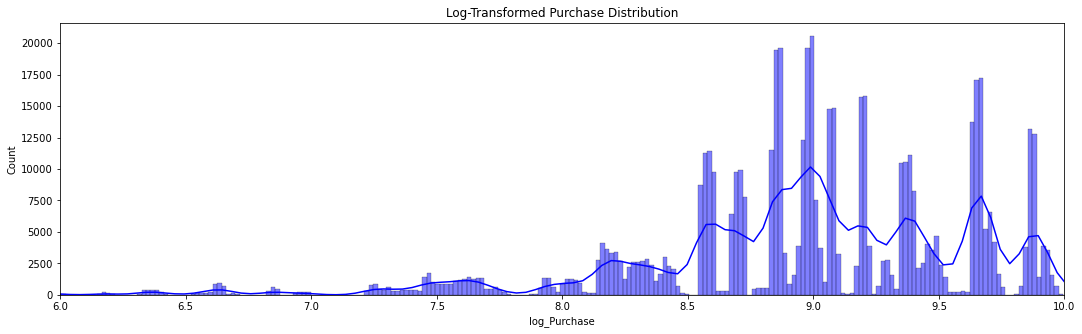

In [8]:
# Log transformation for 'Purchase' to normalize the distribution
plt.figure(figsize=(18, 5))
df["log_Purchase"] = np.log1p(df["Purchase"])
sns.histplot(df["log_Purchase"], color='blue', kde=True)
plt.title("Log-Transformed Purchase Distribution")
plt.xlim(6, 10)
plt.show()

<div style="background-color: #305080; padding: 10px; border: 3px solid white;">
    <p style="text-align: center; color: white; font-size: 24px; margin: 0; position: relative; top: 50%; transform: translateY(-50%);">
        &ndash;&ndash;&ndash;&nbsp;Marital Status&nbsp;&ndash;&ndash;&ndash;
    </p>
</div>

/Users/greenwood/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


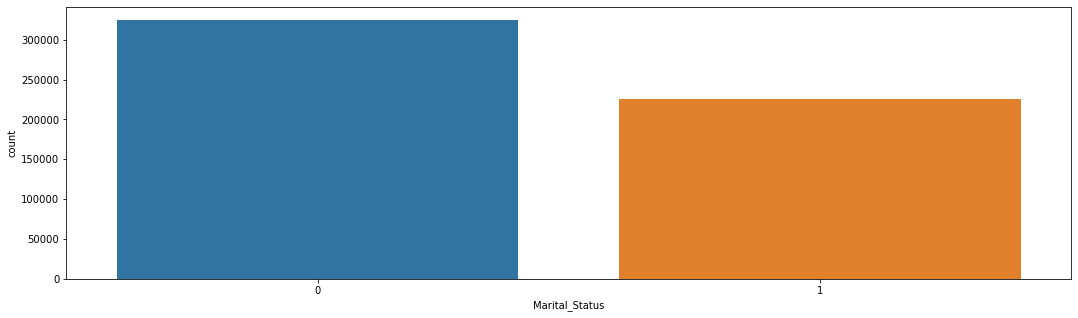

In [9]:
plt.figure(figsize=(18, 5))
sns.countplot(df['Marital_Status'])
plt.show()

In [10]:
print("Mean Purchase Amount by Marital Status:\n", df.groupby("Marital_Status").mean()["Purchase"])

Mean Purchase Amount by Marital Status:
 Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


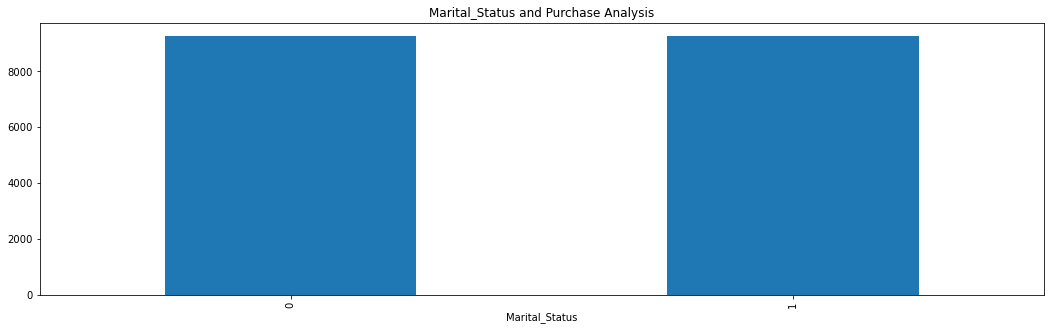

In [11]:
plt.figure(figsize=(18, 5))
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

<div style="background-color: #305080; padding: 10px; border: 3px solid white;">
    <p style="text-align: center; color: white; font-size: 24px; margin: 0; position: relative; top: 50%; transform: translateY(-50%);">
        &ndash;&ndash;&ndash;&nbsp;Occupation&nbsp;&ndash;&ndash;&ndash;
    </p>
</div>

/Users/greenwood/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


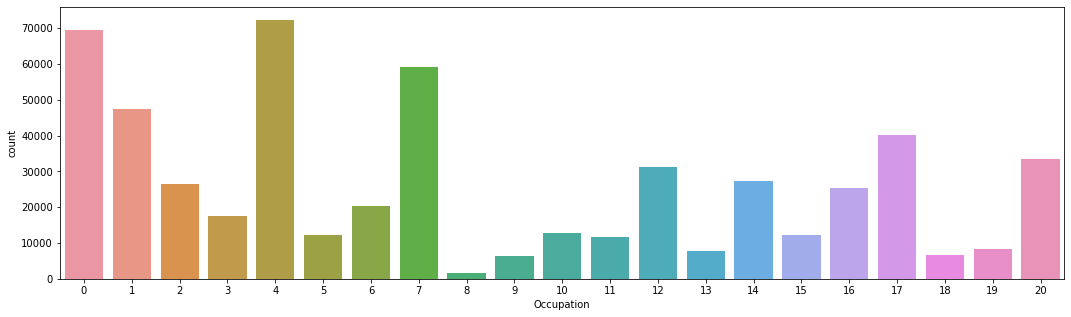

In [12]:
plt.figure(figsize=(18, 5))
sns.countplot(df['Occupation'])
plt.show()

In [13]:
occupation = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
occupation

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


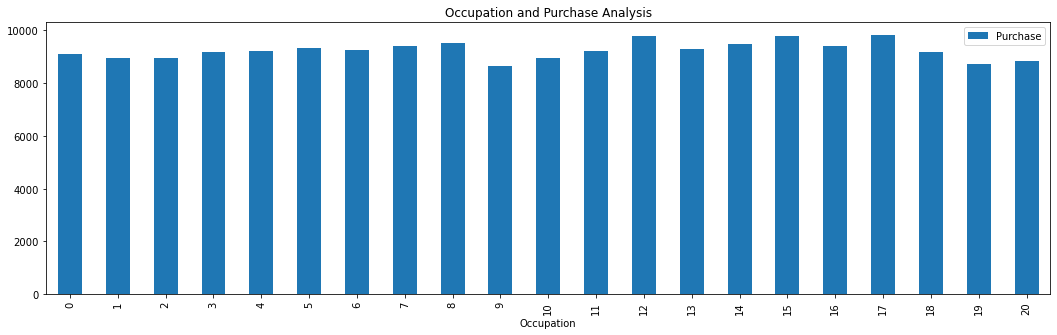

In [14]:
occupation.plot(kind='bar', figsize=(18, 5))
plt.title("Occupation and Purchase Analysis")
plt.show()

<div style="background-color: #305080; padding: 10px; border: 3px solid white;">
    <p style="text-align: center; color: white; font-size: 24px; margin: 0; position: relative; top: 50%; transform: translateY(-50%);">
        &ndash;&ndash;&ndash;&nbsp;City Category&nbsp;&ndash;&ndash;&ndash;
    </p>
</div>

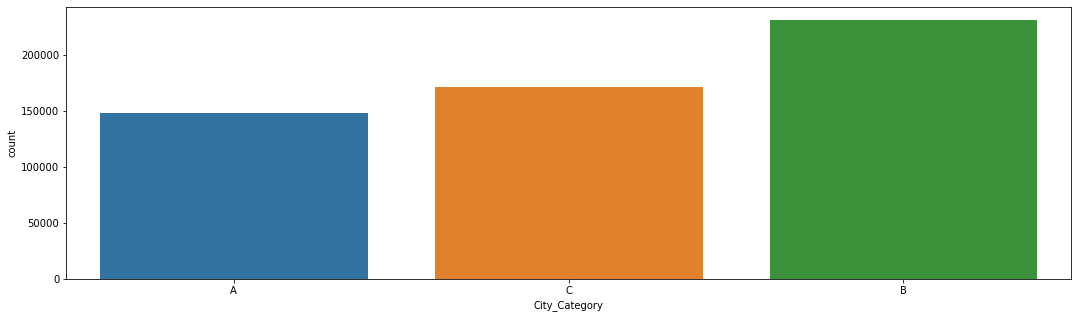

Mean Purchase Amount by City Category:
 City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


In [15]:
plt.figure(figsize=(18, 5))
sns.countplot(x='City_Category', data=df)
plt.show()

print("Mean Purchase Amount by City Category:\n", df.groupby("City_Category").mean()["Purchase"])


<div style="background-color: #305080; padding: 10px; border: 3px solid white;">
    <p style="text-align: center; color: white; font-size: 24px; margin: 0; position: relative; top: 50%; transform: translateY(-50%);">
        &ndash;&ndash;&ndash;&nbsp;Stay In Current City Years&nbsp;&ndash;&ndash;&ndash;
    </p>
</div>

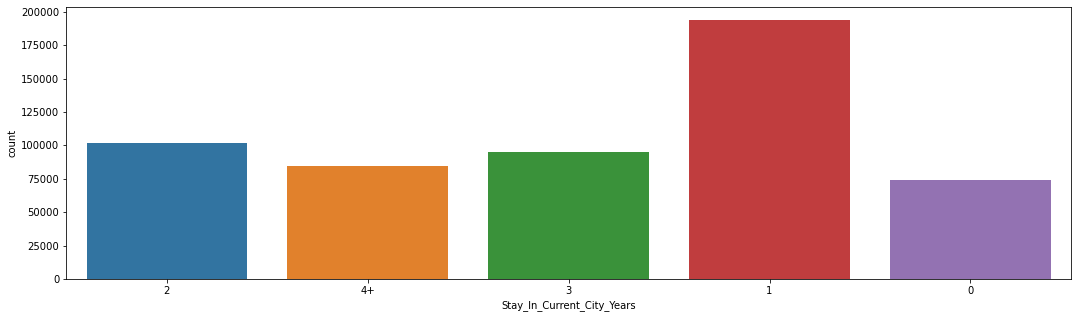

Mean Purchase Amount by Stay In Current City Years:
 Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64


In [16]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Stay_In_Current_City_Years', data=df)
plt.show()

print("Mean Purchase Amount by Stay In Current City Years:\n", df.groupby("Stay_In_Current_City_Years").mean()["Purchase"])


In [17]:
# Remplacement de '4+' par 4 et conversion en entier
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)

# Création de variables dummy pour 'Stay_In_Current_City_Years'
stay_dummies = pd.get_dummies(df['Stay_In_Current_City_Years'], prefix='Stay_In_Current_City_Years')

# Concaténation des variables dummy au DataFrame original
df = pd.concat([df, stay_dummies], axis=1)

# Vérification des nouvelles colonnes ajoutées
print(df.columns)


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'log_Purchase',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4'],
      dtype='object')


In [18]:
print("Mean Purchase Amount by Stay_In_Current_City_Years:\n", df.groupby("Stay_In_Current_City_Years_0").mean()["Purchase"])

Mean Purchase Amount by Stay_In_Current_City_Years:
 Stay_In_Current_City_Years_0
0    9277.090237
1    9180.075123
Name: Purchase, dtype: float64


<AxesSubplot:xlabel='Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4'>

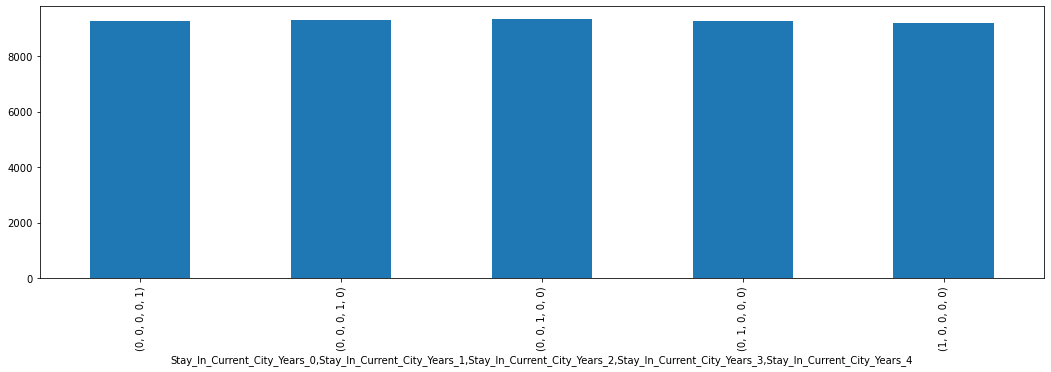

In [19]:
plt.figure(figsize=(18, 5))
stay_years_cols = ['Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4']
df.groupby(stay_years_cols).mean()["Purchase"].plot(kind='bar')

<div style="background-color: #305080; padding: 10px; border: 3px solid white;">
    <p style="text-align: center; color: white; font-size: 24px; margin: 0; position: relative; top: 50%; transform: translateY(-50%);">
        &ndash;&ndash;&ndash;&nbsp;Age&nbsp;&ndash;&ndash;&ndash;
    </p>
</div>

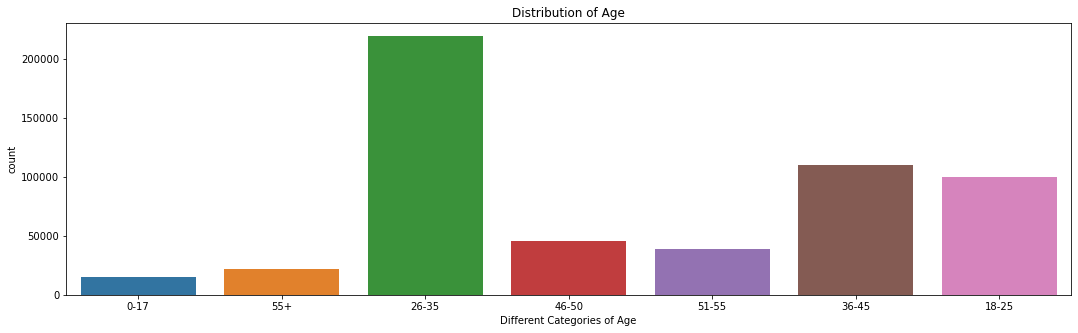

In [20]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Age', data=df)
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

In [21]:
print("Mean Purchase Amount by Age:\n", df.groupby("Age").mean()["Purchase"])

Mean Purchase Amount by Age:
 Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


<div style="background-color: #305080; padding: 10px; border: 3px solid white;">
    <p style="text-align: center; color: white; font-size: 24px; margin: 0; position: relative; top: 50%; transform: translateY(-50%);">
        &ndash;&ndash;&ndash;&nbsp;Product Categories&nbsp;&ndash;&ndash;&ndash;
    </p>
</div>

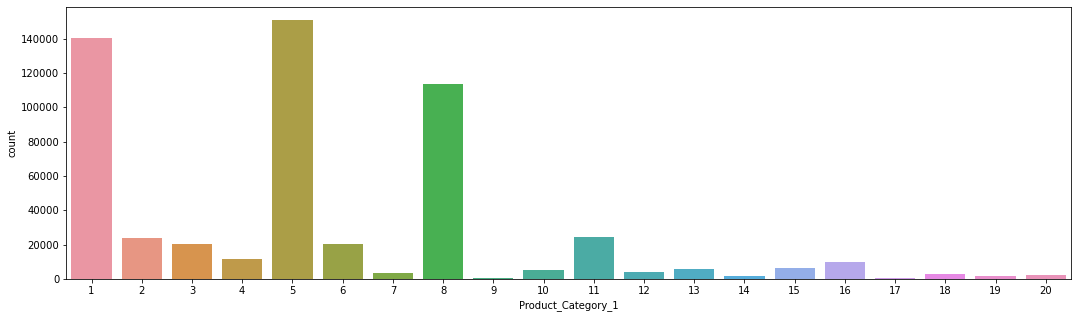

In [22]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Product_Category_1', data=df)
plt.show()

In [23]:
print("Mean Purchase Amount by Product_Category_1:\n", df.groupby('Product_Category_1').mean()['Purchase'])

Mean Purchase Amount by Product_Category_1:
 Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64


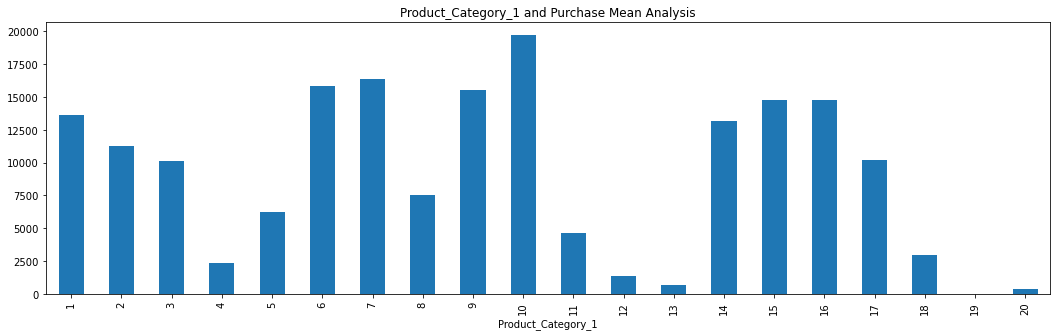

In [24]:
df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar', figsize=(18, 5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

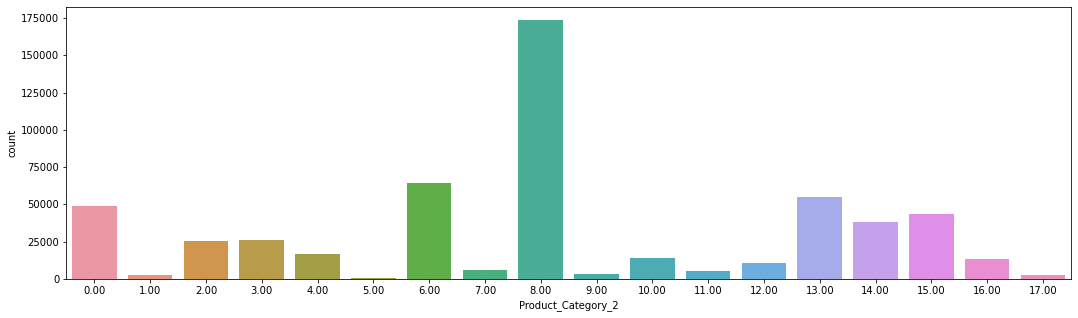

In [25]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Product_Category_2', data=df)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

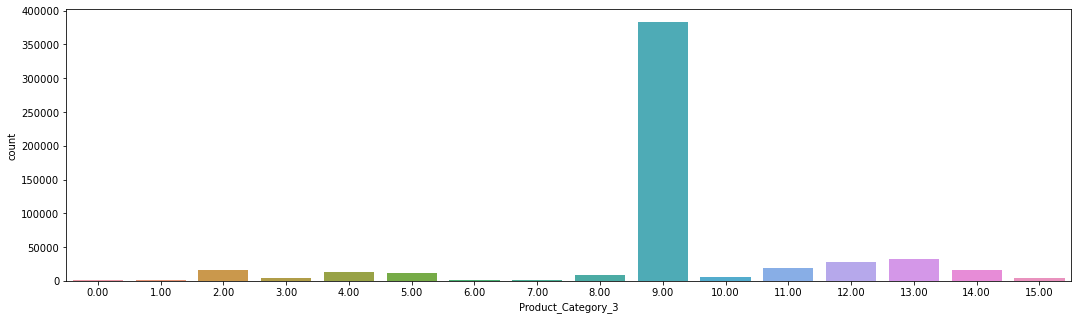

In [26]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Product_Category_3', data=df)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

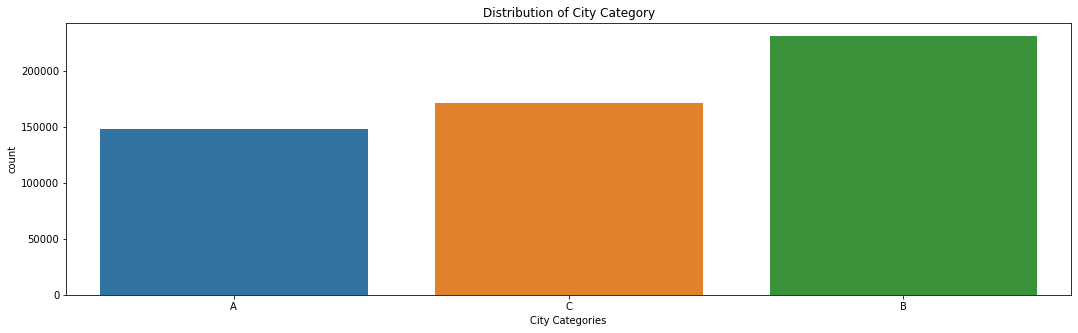

In [27]:
plt.figure(figsize=(18, 5))
sns.countplot(x='City_Category', data=df)
plt.title('Distribution of City Category')
plt.xlabel('City Categories')
plt.show()

In [28]:
print("Mean Purchase Amount by City Category:\n", df.groupby("City_Category").mean()["Purchase"])

Mean Purchase Amount by City Category:
 City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


In [29]:
# Feature Engineering
df = df.copy()
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [30]:
# Encoding Categorical Variables
categorical_cols = ['Gender', 'Age', 'City_Category']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [31]:
# Dropping irrelevant columns for modeling
df.drop(["User_ID", "Product_ID"], axis=1, inplace=True)

In [32]:
# Splitting data into training and test sets
X = df.drop("Purchase", axis=1)
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



<div style="background-color: #305080; padding: 10px; border: 3px solid white;">
    <p style="text-align: center; color: white; font-size: 24px; margin: 0; position: relative; top: 50%; transform: translateY(-50%);">
        &ndash;&ndash;&ndash;&nbsp;Model Training and Evaluation&nbsp;&ndash;&ndash;&ndash;
    </p>
</div>

### Linear Regression Model

In [33]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predictions_lr = linear_reg.predict(X_test)

In [34]:
# Evaluation Metrics for Linear Regression
print("\nLinear Regression Metrics:\n")
print(f"MAE: {mean_absolute_error(y_test, predictions_lr):.3f}")
print(f"MSE: {mean_squared_error(y_test, predictions_lr):.3f}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, predictions_lr)):.3f}")
print(f"R^2: {r2_score(y_test, predictions_lr)}")



Linear Regression Metrics:

MAE: 1849.913
MSE: 6441487.980
RMSE: 2538.009
R^2: 0.7444084738368935


### Decision Tree Regressor Model

In [35]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
predictions_dt = decision_tree.predict(X_test)

In [36]:
# Evaluation Metrics for Decision Tree Regressor
print("\nDecision Tree Regressor Metrics:\n")
print(f"MAE: {mean_absolute_error(y_test, predictions_dt):.3f}")
print(f"MSE: {mean_squared_error(y_test, predictions_dt):.3f}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, predictions_dt)):.3f}")
print(f"R^2: {r2_score(y_test, predictions_dt)}")


Decision Tree Regressor Metrics:

MAE: 0.022
MSE: 0.125
RMSE: 0.353
R^2: 0.9999999950532649


### Random Forest model

In [37]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [38]:
# Display Random Forest evaluation metrics
print("\nRandom Forest Regressor Metrics:\n")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions):.3f}")
print(f"MSE: {mean_squared_error(y_test, rf_predictions):.3f}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, rf_predictions)):.3f}")
print(f"R^2: {r2_score(y_test, rf_predictions)}")


Random Forest Regressor Metrics:

MAE: 0.016
MSE: 0.053
RMSE: 0.231
R^2: 0.9999999978814438


### XGBoost Regressor

In [40]:
def rename_duplicate_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols

# Apply the function to your DataFrame
rename_duplicate_columns(X_train)
rename_duplicate_columns(X_test)  # Make sure to apply the same changes to your test set to maintain consistency.

In [42]:
## XGBoost Regressor Model
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_predictions = xgb_reg.predict(X_test)

In [43]:
# Display XGBoost evaluation metrics
print("\nXGBoost Regressor Metrics:\n")
print(f"MAE: {mean_absolute_error(y_test, xgb_predictions):.3f}")
print(f"MSE: {mean_squared_error(y_test, xgb_predictions):.3f}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, xgb_predictions)):.3f}")
print(f"R^2: {r2_score(y_test, xgb_predictions)}")


XGBoost Regressor Metrics:

MAE: 15.605
MSE: 1116.467
RMSE: 33.414
R^2: 0.9999556997556502


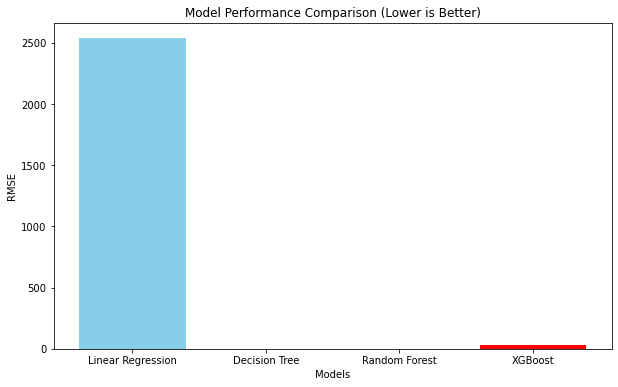

In [45]:
rmse_values = {
    "Linear Regression": sqrt(mean_squared_error(y_test, predictions_lr)),
    "Decision Tree": sqrt(mean_squared_error(y_test, predictions_dt)),
    "Random Forest": sqrt(mean_squared_error(y_test, rf_predictions)),
    "XGBoost": sqrt(mean_squared_error(y_test, xgb_predictions))
}

# Data for plotting
models = list(rmse_values.keys())
rmse_scores = list(rmse_values.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['skyblue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (Lower is Better)')
plt.show()


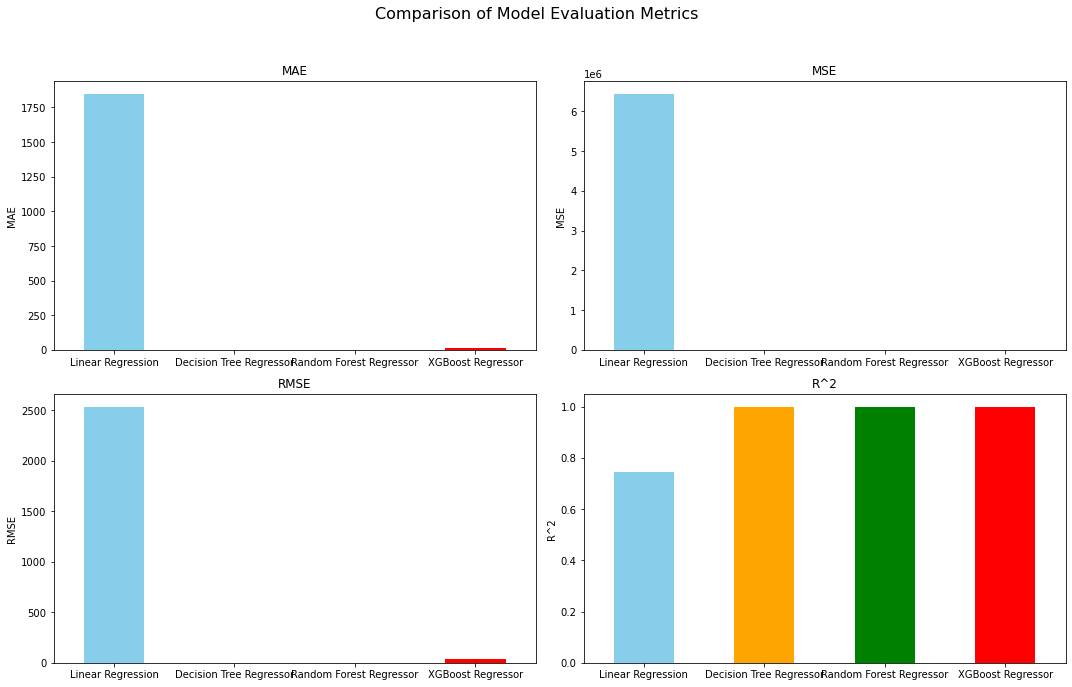

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hypothetical evaluation metrics for each model
metrics = {
    "Model": ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost Regressor"],
    "MAE": [
        mean_absolute_error(y_test, predictions_lr),
        mean_absolute_error(y_test, predictions_dt),
        mean_absolute_error(y_test, rf_predictions),
        mean_absolute_error(y_test, xgb_predictions)
    ],
    "MSE": [
        mean_squared_error(y_test, predictions_lr),
        mean_squared_error(y_test, predictions_dt),
        mean_squared_error(y_test, rf_predictions),
        mean_squared_error(y_test, xgb_predictions)
    ],
    "RMSE": [
        sqrt(mean_squared_error(y_test, predictions_lr)),
        sqrt(mean_squared_error(y_test, predictions_dt)),
        sqrt(mean_squared_error(y_test, rf_predictions)),
        sqrt(mean_squared_error(y_test, xgb_predictions))
    ],
    "R^2": [
        r2_score(y_test, predictions_lr),
        r2_score(y_test, predictions_dt),
        r2_score(y_test, rf_predictions),
        r2_score(y_test, xgb_predictions)
    ]
}

df_metrics = pd.DataFrame(metrics)
df_metrics.set_index('Model', inplace=True)

# Transpose the DataFrame for easier plotting
df_metrics = df_metrics.T

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Comparison of Model Evaluation Metrics', fontsize=16)

metrics = ['MAE', 'MSE', 'RMSE', 'R^2']
colors = ['skyblue', 'orange', 'green', 'red']
for ax, metric in zip(axes.flatten(), metrics):
    df_metrics.loc[metric].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('')
    ax.tick_params(labelrotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()